In [1]:
#import libraries
import pandas as pd
import numpy as np
import string
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
#reading in data
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [25]:
#check first few rows
train.head(7)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...


In [26]:
#data Cleaning tasks
#1. remove @user handles
#2. remomve words with less than or equal to 3 letters
#3. remove special character and punctuations
#4. do stemming or lemmatizations

In [27]:
#1. remove @user handle

In [28]:
#combine both train and test to ease our task
combi = train.append(test, ignore_index = True)

In [29]:
#function that removes a pattern form an input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'', input_txt)
        
    return input_txt

In [30]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")

In [31]:
#remove special character, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

In [32]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [33]:
#remove short words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [34]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [35]:
#Tokenization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [40]:
#Stemming
from nltk import PorterStemmer
ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(w) for w in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [42]:
#visualizing the data


In [43]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


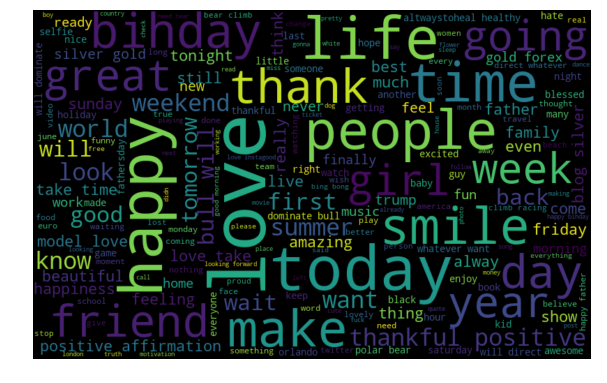

In [52]:
#most common words
all_words = ' '.join([w for w in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

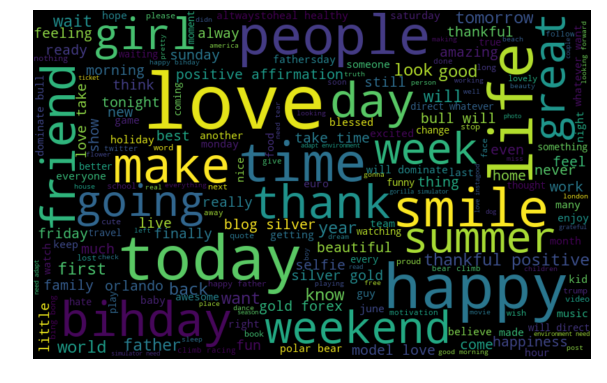

In [57]:
#words in non-racist/non-sexist tweets
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])
wordcloud = WordCloud(width=800,height=500,max_font_size=110).generate(normal_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()


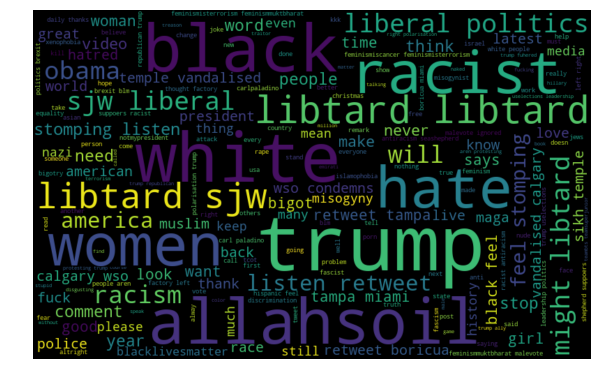

In [56]:
#words in racist/sexist tweets
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])
wordcloud = WordCloud(width=800,height=500,max_font_size=110).generate(negative_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()


In [68]:
#find trending hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    
    return hashtags

In [69]:
#hashtags from regular tweets:
ht_regular = hashtag_extract(combi['tidy_tweet'][combi['label']==0])

In [70]:
#hashtags from sexist tweets
ht_negative = hashtag_extract(combi['tidy_tweet'][combi['label']==1])

In [71]:
#unnesting list .... //?????
ht_regular = sum(ht_regular,[])
ht_negative = sum(ht_negative,[])

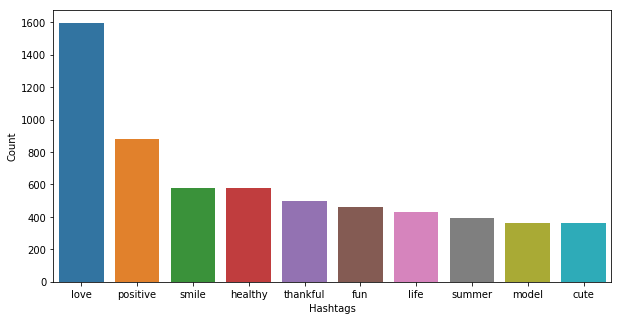

In [72]:
#plot the top hashtags for regular tweets
a = nltk.FreqDist(ht_regular)
d = pd.DataFrame({
                'Hashtags':list(a.keys()),
                'Count':list(a.values())
                 })
#selecting top 10 most freq hashtags
d = d.nlargest(columns = "Count", n= 10)
plt.figure(figsize = (10,5))
ax = sns.barplot(data = d,x = "Hashtags", y = "Count")

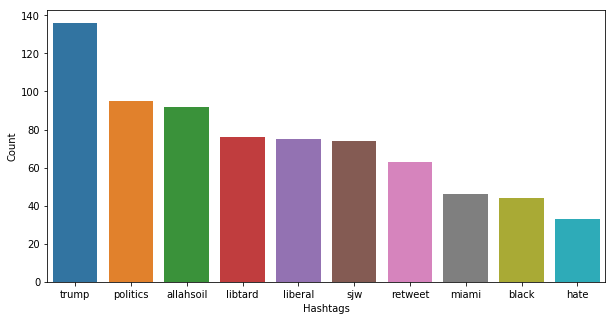

In [73]:
#plot the top hashtags for racist tweets
a = nltk.FreqDist(ht_negative)
d = pd.DataFrame({
                'Hashtags':list(a.keys()),
                'Count':list(a.values())
                 })
#selecting top 10 most freq hashtags
d = d.nlargest(columns = "Count", n= 10)
plt.figure(figsize = (10,5))
ax = sns.barplot(data = d,x = "Hashtags", y = "Count")